# Big Project (Homework Assignemnt- 03)

## Lazy FCA (Formal Concept Analysis) Classifcation.

**Dataset Target and Features Descriptions:**

- **id:** Unique identifier for each patient
- **age:** Age of the patient (in years)
- **sex:** Gender of the patient (Male/Female)
- **dataset:** Location of the study
- **cp:** Type of chest pain (typical angina, atypical angina, non-anginal, asymptomatic)
- **trestbps:** Resting blood pressure (in mm Hg at hospital admission)
- **chol:** Serum cholesterol level (in mg/dl)
- **fbs:** Fasting blood sugar (>120 mg/dl, True/False)
- **restecg:** Resting electrocardiographic results (normal, ST-T abnormality, left ventricular hypertrophy)
- **thalach:** Maximum heart rate achieved
- **exang:** Exercise-induced angina (Yes/No)
- **oldpeak:** ST depression induced by exercise relative to rest
- **slope:** Slope of the peak exercise ST segment
- **ca:** Number of major vessels (0-3) identified via fluoroscopy
- **thal:** Thalassemia type (normal, fixed defect, reversible defect)
- **num:** Diagnosis outcome (0 indicates no presence of heart disease)

### Import libraries

In [1]:
# Import necessary libraries for data processing, visualization, and machine learning
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For advanced data visualization (statistical plots)
from sklearn.impute import SimpleImputer # For handling missing data
from sklearn.model_selection import train_test_split  # For splitting the data into training and testing sets
import math

### Load the dataset

In [2]:
# Load the dataset
df = pd.read_csv('heart_disease_uci.csv')  # Load the heart disease dataset into a DataFrame
df.head()  # Display the first few rows of the dataset to get an overview

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Exploratory Data Analysis

### Display basic information of dataset

In [3]:
# Display basic information about the dataset (e.g., column types, non-null values)
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None


#### Dataset Information

The dataset contains **920 entries** with **16 columns**. Each column represents a specific feature related to heart disease diagnosis. Below is a detailed description of the dataset:

#### General Information
- **Number of Rows**: 920
- **Number of Columns**: 16
- **Missing Values**: Several columns (e.g., `trestbps`, `chol`, `slope`, `ca`, `thal`) have missing values, which may need imputation or handling during preprocessing.
- **Data Types**: The dataset includes:
  - `float64` (5 columns): Continuous numerical features.
  - `int64` (3 columns): Integer features, including identifiers and the target variable.
  - `object` (8 columns): Categorical features such as gender, chest pain type, and thalassemia status.


### Display basic statistics of categorical features

In [4]:
# Display basic statistics for numeric columns (e.g., mean, min, max, etc.)
print("\nBasic Statistical Description:")
df.describe()


Basic Statistical Description:


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [5]:
# Drop irrelevant columns (e.g., 'id' column, if it's not needed for the analysis)
#df = df.drop(columns=['id'])
(df['id'].min(),df['id'].max(),)

(1, 920)

In [6]:
df['id'].nunique()

920

### Feature correlation analysis

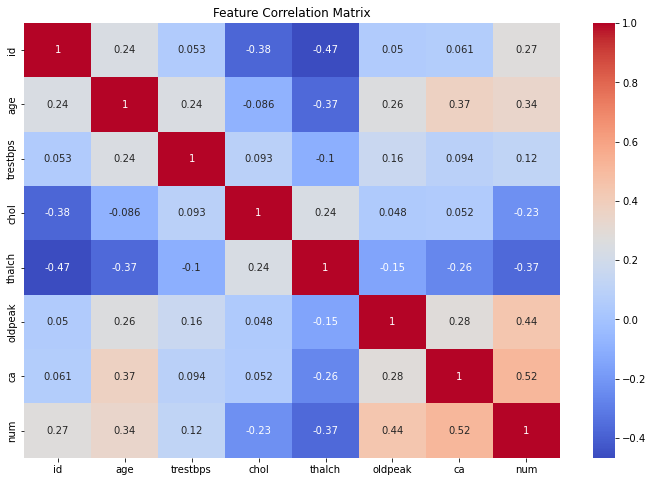

In [7]:
# Feature correlation analysis - Compute the correlation matrix for all features
correlation_matrix = df.corr()  # Calculate pairwise correlation of features
plt.figure(figsize=(12, 8))  # Set the figure size for the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  # Visualize correlation matrix using heatmap
plt.title("Feature Correlation Matrix")  # Set title for the plot
plt.show()  # Display the plot

### Analysis from this correlation plot
From this correlation plot a significant correlation exists between "num" (heart disease diagnosis) and "ca" (number of major vessels) and "oldpeak" (ST depression caused by exercise), suggesting an association between increased values in these features and a higher risk of heart disease.  Conversely, "num" exhibits a negative correlation with "thalch" (maximum heart rate achieved), indicating that individuals with higher exercise capacity may have a lower risk of heart disease. 

### Relationship between features and the target variable

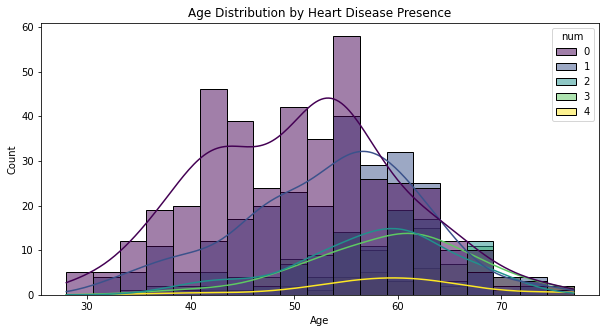

In [8]:
# Visualize the relationship between features and the target variable 'num'
# Plotting the distribution of age based on heart disease presence
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='age', hue='num', kde=True, palette='viridis')  # Plot age distribution with heart disease classes
plt.title("Age Distribution by Heart Disease Presence")  # Set plot title
plt.xlabel("Age")  # Label the x-axis
plt.ylabel("Count")  # Label the y-axis
plt.show()  # Display the plot

### Distribution analysis of heart disease based on age

In the plot, there is a clear association between age and the presence of heart disease. As age increases, the likelihood of heart disease also increases. Individuals without heart disease are more evenly distributed across the age range, while those with heart disease tend to live longer. Accordingly, heart disease risk increases with age. 

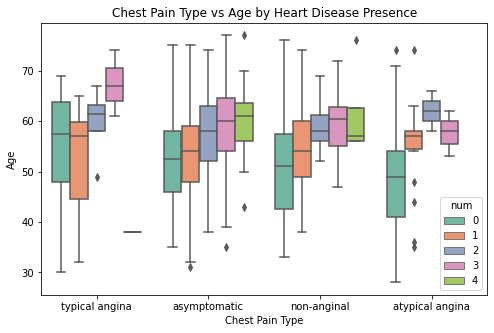

In [9]:
# Box plot to examine the relationship between chest pain type ('cp') and age, with respect to heart disease presence
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='cp', y='age', hue='num', palette='Set2')  # Box plot for chest pain type vs age
plt.title("Chest Pain Type vs Age by Heart Disease Presence")  # Set plot title
plt.xlabel("Chest Pain Type")  # Label the x-axis
plt.ylabel("Age")  # Label the y-axis
plt.show()  # Display the plot

### Box plot analysis of the relationship between (Chest pain) vs (Age), vs (Heart Disease)

The graph shows that people with chest pain, especially typical angina, tend to be older, whether they have heart disease or not. It also shows that older people are more likely to have heart disease, regardless of their chest pain type. This suggests that age is a major factor in heart disease, especially when combined with certain types of chest pain.

### Identify categorical and continuous features in the dataset

In [22]:
df['ca'] = df['ca'].astype('object')

In [23]:
# Identify categorical and continuous features in the dataset
categorical_features = df.select_dtypes(include=['object']).columns  # Categorical features are of type 'object'
continuous_features = df.select_dtypes(include=['number']).columns  # Continuous features are of numeric type

In [24]:
categorical_features

Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca',
       'thal'],
      dtype='object')

In [25]:
continuous_features

Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num'], dtype='object')

In [26]:
# Display value counts for each categorical feature (to understand the distribution of categories)
for col in categorical_features:
    print(f"Value counts for {col}:\n{df[col].value_counts()}\n")

Value counts for sex:
Male      726
Female    194
Name: sex, dtype: int64

Value counts for dataset:
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: dataset, dtype: int64

Value counts for cp:
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: cp, dtype: int64

Value counts for fbs:
False    692
True     138
Name: fbs, dtype: int64

Value counts for restecg:
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: restecg, dtype: int64

Value counts for exang:
False    528
True     337
Name: exang, dtype: int64

Value counts for slope:
flat           345
upsloping      203
downsloping     63
Name: slope, dtype: int64

Value counts for ca:
0.0    181
1.0     67
2.0     41
3.0     20
Name: ca, dtype: int64

Value counts for thal:
normal               196
reversable defect    192
fixed defect          46
Name: thal, dtype: int64



In [27]:
df['cp'].unique()

array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

- **Typical Angina:** Chest pain caused by reduced blood flow to the heart, usually triggered by physical exertion or stress.
- **Asymptomatic:** No noticeable chest pain or symptoms, even if there's underlying heart disease.
- **Non-Anginal:** Chest pain not related to heart problems, often caused by conditions like acid reflux or muscle strain.
- **Atypical Angina:** Chest pain with unusual symptoms, such as discomfort not directly linked to exertion or classic angina triggers.

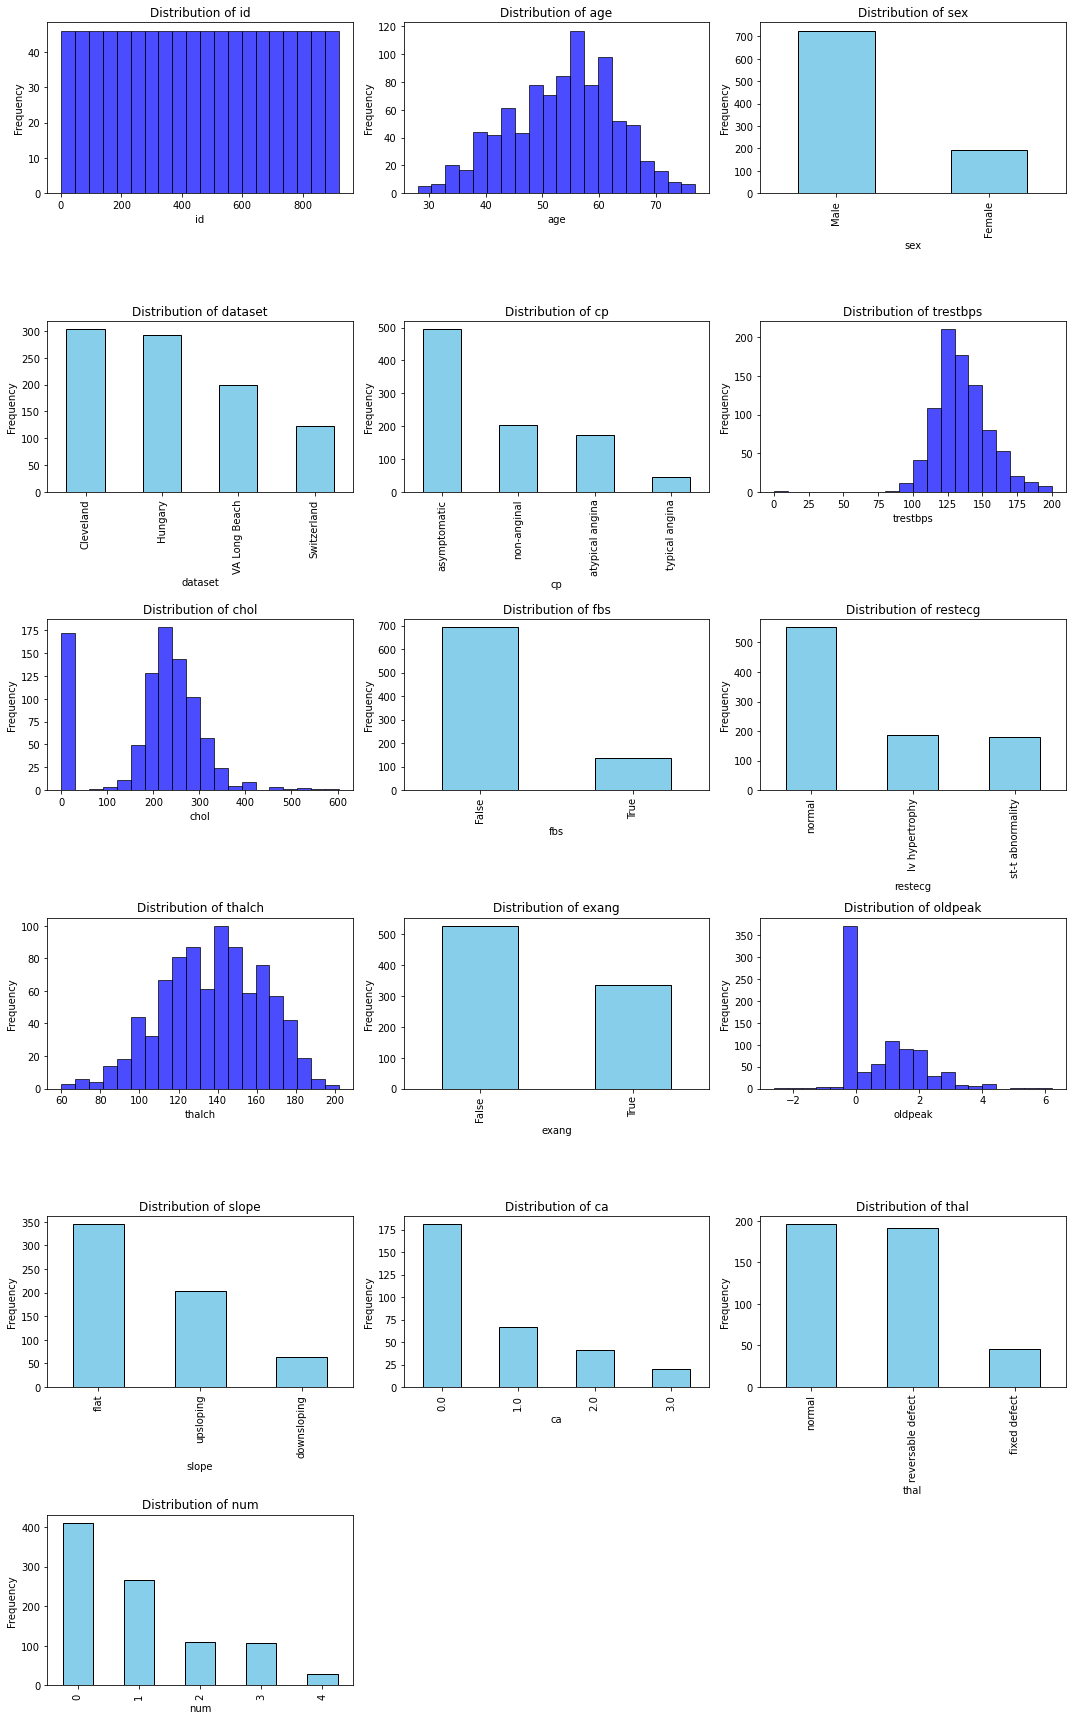

In [28]:
# Ensure df is defined as a DataFrame
num_columns = len(df.columns)
cols = 3  # Number of columns in the grid
rows = math.ceil(num_columns / cols)

# Create a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))  # Adjust figure size
axes = axes.flatten()  # Flatten to easily iterate over axes

for i, column in enumerate(df.columns):
    ax = axes[i]
    if df[column].isna().all():
        ax.set_visible(False)
        continue
    if df[column].dtype == 'object' or len(df[column].unique()) < 20:
        # For categorical or discrete features, use a bar plot
        df[column].value_counts().plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
    else:
        # For continuous features, use a histogram
        df[column].dropna().plot(kind='hist', bins=20, ax=ax, color='blue', edgecolor='black', alpha=0.7)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout for readability
plt.show()

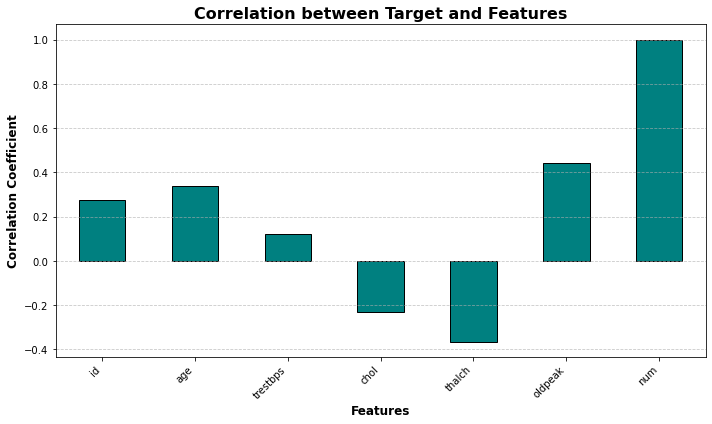

In [29]:
# Ensure X and y are numeric for correlation computation
numeric_X = df.select_dtypes(include=['number'])  # Select only numeric features
y = df['num']  # Replace 'target' with your actual target column name

# Calculate correlations
correlations = numeric_X.corrwith(y)

# Plot correlations
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Correlation between Target and Features', fontsize=16, weight='bold')
plt.xlabel('Features', fontsize=12, weight='bold')
plt.ylabel('Correlation Coefficient', fontsize=12, weight='bold')
plt.xticks(rotation=45, ha='right')  # Rotate feature names for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [30]:
# Check for missing values in the features (X)
print("\nMissing Values Count:")
print(df.isnull().sum())


Missing Values Count:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


### Missing Values

Some values are missing, like blood pressure, cholesterol levels, and heart rate measurements. We need to fix this before we can fully analyze the data and draw reliable conclusions about heart disease.

### Handling missing values

In [31]:
# Handle missing data
# For categorical features, use the most frequent value to fill missing data
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_features] = cat_imputer.fit_transform(df[categorical_features])

In [32]:
# For continuous features, use the mean value to fill missing data
cont_imputer = SimpleImputer(strategy='mean')
df[continuous_features] = cont_imputer.fit_transform(df[continuous_features])

# Confirm that missing values have been imputed
print("Missing values after imputation: ")
df.isnull().sum()

Missing values after imputation: 


id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [33]:
# In trestbps column, minimum outlier value is 0, let's identify where the value of trestbps in dataset is 0.
df[df['trestbps']==0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
753,754.0,55.0,Male,VA Long Beach,non-anginal,0.0,0.0,False,normal,155.0,False,1.5,flat,0.0,normal,3.0


- **Resting Blood Pressure(Trestbps):** Normal human blood pressure ranges from 90/60 mmHg to 120/80 mmHg. A value of 0 is medically impossible, so this is clearly an outlier.


In [34]:
#remove this row
df = df[df['trestbps'] != 0]

#check the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 919 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    float64
 1   age       919 non-null    float64
 2   sex       919 non-null    object 
 3   dataset   919 non-null    object 
 4   cp        919 non-null    object 
 5   trestbps  919 non-null    float64
 6   chol      919 non-null    float64
 7   fbs       919 non-null    object 
 8   restecg   919 non-null    object 
 9   thalch    919 non-null    float64
 10  exang     919 non-null    object 
 11  oldpeak   919 non-null    float64
 12  slope     919 non-null    object 
 13  ca        919 non-null    object 
 14  thal      919 non-null    object 
 15  num       919 non-null    float64
dtypes: float64(7), object(9)
memory usage: 122.1+ KB


## Feature Binarization for Heart Disease Prediction Dataset

### Initialize an empty DataFrame

In [40]:
# Initialize an empty DataFrame to store the binarized features
df_binarized = pd.DataFrame(index=df.index)

### 1. Age (age)

**Binarization:**
- **Thresholds:** `<40, 40-60, 60-80, ≥80`.
- **Categories:**
  - `age_le_40`: Age ≤ 40.
  - `age_40_to_60`: Age in (40, 60].
  - `age_60_to_80`: Age in (60, 80].
  - `age_ge_80`: Age ≥ 80.

**Reason:**  
These thresholds correspond to common groupings used in medical studies to analyze age-related health risks (e.g., young adults, middle-aged, elderly).

In [41]:
# 1. Binarizing 'age' with thresholds
min_age = df['age'].min()
max_age = df['age'].max()
age_thresholds = [min_age, 40, 60, max_age]
for threshold in age_thresholds:
    df_binarized[f'age_le_{threshold}'] = (df['age'] <= threshold).astype(int)
    df_binarized[f'age_ge_{threshold}'] = (df['age'] >= threshold).astype(int)

In [42]:
df_binarized

,age_le_28.0,age_ge_28.0,age_le_40,age_ge_40,age_le_60,age_ge_60,age_le_77.0,age_ge_77.0
0,0,1,0,1,0,1,1,0
1,0,1,0,1,0,1,1,0
2,0,1,0,1,0,1,1,0
3,0,1,1,0,1,0,1,0
4,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...
915,0,1,0,1,1,0,1,0
916,0,1,0,1,0,1,1,0
917,0,1,0,1,1,0,1,0
918,0,1,0,1,1,0,1,0


### 2. Sex (sex)

**Binarization:**
- `male`: Sex = 1 (male).
- `female`: Sex = 0 (female).

**Reason:**  
This binary feature directly represents male or female. No additional binarization was necessary.

In [43]:
df['sex'].value_counts()

Male      725
Female    194
Name: sex, dtype: int64

In [44]:
# 2. Binarizing 'sex' (1 for male, 0 for female)
df_binarized['sex_male'] = (df['sex'] == 'Male').astype(int)
df_binarized['sex_female'] = (df['sex'] == 'Female').astype(int)

In [45]:
df_binarized

,age_le_28.0,age_ge_28.0,age_le_40,age_ge_40,age_le_60,age_ge_60,age_le_77.0,age_ge_77.0,sex_male,sex_female
0,0,1,0,1,0,1,1,0,1,0
1,0,1,0,1,0,1,1,0,1,0
2,0,1,0,1,0,1,1,0,1,0
3,0,1,1,0,1,0,1,0,1,0
4,0,1,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
915,0,1,0,1,1,0,1,0,0,1
916,0,1,0,1,0,1,1,0,1,0
917,0,1,0,1,1,0,1,0,1,0
918,0,1,0,1,1,0,1,0,1,0


### 3. Dataset Identifier (dataset)

**Binarization:**
- `dataset_x`: Binary flags for each dataset (e.g., Dataset 1, 2, etc.).
- Cleveland       
- Hungary          
- VA Long Beach    
- Switzerland     

**Reason:**  
The dataset field likely indicates the source of the data or study groups. Binarizing it allows separating and comparing different subsets of the dataset.


In [46]:
df['dataset'].value_counts()

Cleveland        304
Hungary          293
VA Long Beach    199
Switzerland      123
Name: dataset, dtype: int64

In [47]:
# 3. Binarizing 'dataset' feature (Dataset Identifier Type)
df_binarized['data_Cleveland'] = (df['dataset'] == 'Cleveland').astype(int)
df_binarized['data_Hungary'] = (df['dataset'] == 'Hungary').astype(int)
df_binarized['data_VA_Long_Beach'] = (df['dataset'] == 'VA Long Beach').astype(int)
df_binarized['data_Switzerland'] = (df['dataset'] == 'Switzerland').astype(int)

In [48]:
df_binarized

,age_le_28.0,age_ge_28.0,age_le_40,age_ge_40,age_le_60,age_ge_60,age_le_77.0,age_ge_77.0,sex_male,sex_female,data_Cleveland,data_Hungary,data_VA_Long_Beach,data_Switzerland
0,0,1,0,1,0,1,1,0,1,0,1,0,0,0
1,0,1,0,1,0,1,1,0,1,0,1,0,0,0
2,0,1,0,1,0,1,1,0,1,0,1,0,0,0
3,0,1,1,0,1,0,1,0,1,0,1,0,0,0
4,0,1,0,1,1,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,0,1,0,1,1,0,1,0,0,1,0,0,1,0
916,0,1,0,1,0,1,1,0,1,0,0,0,1,0
917,0,1,0,1,1,0,1,0,1,0,0,0,1,0
918,0,1,0,1,1,0,1,0,1,0,0,0,1,0


### 4. Chest Pain Type (cp)

**Binarization:**
- `cp_1`: Typical angina.
- `cp_2`: Atypical angina.
- `cp_3`: Non-anginal pain.
- `cp_4`: Asymptomatic.

**Reason:**  
Chest pain types are categorical with ordinal levels, so binary indicators for each category are appropriate to allow the classifier to distinguish specific types.

In [49]:
df['cp'].value_counts()

asymptomatic       496
non-anginal        203
atypical angina    174
typical angina      46
Name: cp, dtype: int64

In [50]:
# 4. Binarizing 'cp' (Chest Pain Type)
df_binarized['cp_typical_angina'] = (df['cp'] == 'typical angina').astype(int)
df_binarized['cp_atypical_angina'] = (df['cp'] == 'atypical angina').astype(int)
df_binarized['cp_non_anginal'] = (df['cp'] == 'non-anginal').astype(int)
df_binarized['cp_asymptomatic'] = (df['cp'] == 'asymptomatic').astype(int)

In [51]:
df_binarized

,age_le_28.0,age_ge_28.0,age_le_40,age_ge_40,age_le_60,age_ge_60,age_le_77.0,age_ge_77.0,sex_male,sex_female,data_Cleveland,data_Hungary,data_VA_Long_Beach,data_Switzerland,cp_typical_angina,cp_atypical_angina,cp_non_anginal,cp_asymptomatic
0,0,1,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0
1,0,1,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,1
2,0,1,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,1
3,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0
4,0,1,0,1,1,0,1,0,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1
916,0,1,0,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0
917,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,1
918,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,1




## 5. Resting Blood Pressure (trestbps)

**Binarization:**
- **Thresholds:** `<120, 120-139, 140-159, ≥160`.
- **Categories:**
  - `trestbps_le_120`: BP ≤ 120.
  - `trestbps_120_to_139`: BP in (120, 139].
  - `trestbps_140_to_159`: BP in (140, 159].
  - `trestbps_ge_160`: BP ≥ 160.

**Reason:**  
These thresholds align with hypertension stages (normal, pre-hypertension, hypertension stages 1 and 2).

In [52]:
(
len(df[df['trestbps'] < 120]),
len(df[df['trestbps'] < 140]),
len(df[df['trestbps'] < 160]),
len(df[df['trestbps'] >= 160])
)

(161, 608, 826, 93)

In [53]:
# 5. Binarizing 'trestbps' (Resting Blood Pressure)
min_trestbps = df['trestbps'].min()
max_trestbps = df['trestbps'].max()
trestbps_thresholds = [min_trestbps, 120, 140, 160, max_trestbps]
for threshold in trestbps_thresholds:
    df_binarized[f'trestbps_le_{threshold}'] = (df['trestbps'] <= threshold).astype(int)
    df_binarized[f'trestbps_ge_{threshold}'] = (df['trestbps'] >= threshold).astype(int)

In [54]:
df_binarized

,age_le_28.0,age_ge_28.0,age_le_40,age_ge_40,age_le_60,age_ge_60,age_le_77.0,age_ge_77.0,sex_male,sex_female,...,trestbps_le_80.0,trestbps_ge_80.0,trestbps_le_120,trestbps_ge_120,trestbps_le_140,trestbps_ge_140,trestbps_le_160,trestbps_ge_160,trestbps_le_200.0,trestbps_ge_200.0
0,0,1,0,1,0,1,1,0,1,0,...,0,1,0,1,0,1,1,0,1,0
1,0,1,0,1,0,1,1,0,1,0,...,0,1,0,1,0,1,1,1,1,0
2,0,1,0,1,0,1,1,0,1,0,...,0,1,1,1,1,0,1,0,1,0
3,0,1,1,0,1,0,1,0,1,0,...,0,1,0,1,1,0,1,0,1,0
4,0,1,0,1,1,0,1,0,0,1,...,0,1,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,0,1,0,1,1,0,1,0,0,1,...,0,1,0,1,1,0,1,0,1,0
916,0,1,0,1,0,1,1,0,1,0,...,0,1,0,1,1,0,1,0,1,0
917,0,1,0,1,1,0,1,0,1,0,...,0,1,0,1,1,0,1,0,1,0
918,0,1,0,1,1,0,1,0,1,0,...,0,1,0,1,1,0,1,0,1,0


## 6. Cholesterol (chol)

**Binarization:**
- **Thresholds:** `<200, 200-239, ≥240`.
- **Categories:**
  - `chol_le_200`: Cholesterol ≤ 200 (desirable).
  - `chol_200_to_239`: Cholesterol in (200, 239] (borderline high).
  - `chol_ge_240`: Cholesterol ≥ 240 (high).

**Reason:**  
These thresholds are clinically defined ranges for cholesterol levels.

In [55]:
(
len(df[df['chol'] < 200]),
len(df[(df['chol'] >= 200) & (df['chol'] <= 239)]),
len(df[df['chol'] >= 240])
)

(329, 231, 359)

In [56]:
# 6. Binarizing 'chol' (Serum Cholesterol)
min_chol = df['chol'].min()
max_chol = df['chol'].max()
chol_thresholds = [min_chol, 200, 240, max_chol]
for threshold in chol_thresholds:
    df_binarized[f'chol_le_{threshold}'] = (df['chol'] <= threshold).astype('int')
    df_binarized[f'chol_ge_{threshold}'] = (df['chol'] >= threshold).astype('int')

In [57]:
df_binarized

,age_le_28.0,age_ge_28.0,age_le_40,age_ge_40,age_le_60,age_ge_60,age_le_77.0,age_ge_77.0,sex_male,sex_female,...,trestbps_le_200.0,trestbps_ge_200.0,chol_le_0.0,chol_ge_0.0,chol_le_200,chol_ge_200,chol_le_240,chol_ge_240,chol_le_603.0,chol_ge_603.0
0,0,1,0,1,0,1,1,0,1,0,...,1,0,0,1,0,1,1,0,1,0
1,0,1,0,1,0,1,1,0,1,0,...,1,0,0,1,0,1,0,1,1,0
2,0,1,0,1,0,1,1,0,1,0,...,1,0,0,1,0,1,1,0,1,0
3,0,1,1,0,1,0,1,0,1,0,...,1,0,0,1,0,1,0,1,1,0
4,0,1,0,1,1,0,1,0,0,1,...,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,0,1,0,1,1,0,1,0,0,1,...,1,0,0,1,0,1,0,1,1,0
916,0,1,0,1,0,1,1,0,1,0,...,1,0,0,1,1,0,1,0,1,0
917,0,1,0,1,1,0,1,0,1,0,...,1,0,0,1,0,1,1,0,1,0
918,0,1,0,1,1,0,1,0,1,0,...,1,0,0,1,0,1,0,1,1,0


### 7. Fasting Blood Sugar (fbs)

**Binarization:**
- `fbs_high`: FBS > 120.
- `fbs_normal`: FBS ≤ 120.

**Reason:**  
The clinical cutoff of 120 mg/dL separates normal and abnormal fasting blood sugar levels.

In [58]:
df['fbs'].value_counts()

False    781
True     138
Name: fbs, dtype: int64

In [59]:
# 7. Binarizing 'fbs' (Fasting Blood Sugar)
df_binarized['fbs_1'] = (df['fbs'] == True).astype(int)
df_binarized['fbs_0'] = (df['fbs'] == False).astype(int)

In [60]:
df_binarized

,age_le_28.0,age_ge_28.0,age_le_40,age_ge_40,age_le_60,age_ge_60,age_le_77.0,age_ge_77.0,sex_male,sex_female,...,chol_le_0.0,chol_ge_0.0,chol_le_200,chol_ge_200,chol_le_240,chol_ge_240,chol_le_603.0,chol_ge_603.0,fbs_1,fbs_0
0,0,1,0,1,0,1,1,0,1,0,...,0,1,0,1,1,0,1,0,1,0
1,0,1,0,1,0,1,1,0,1,0,...,0,1,0,1,0,1,1,0,0,1
2,0,1,0,1,0,1,1,0,1,0,...,0,1,0,1,1,0,1,0,0,1
3,0,1,1,0,1,0,1,0,1,0,...,0,1,0,1,0,1,1,0,0,1
4,0,1,0,1,1,0,1,0,0,1,...,0,1,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,0,1,0,1,1,0,1,0,0,1,...,0,1,0,1,0,1,1,0,1,0
916,0,1,0,1,0,1,1,0,1,0,...,0,1,1,0,1,0,1,0,0,1
917,0,1,0,1,1,0,1,0,1,0,...,0,1,0,1,1,0,1,0,1,0
918,0,1,0,1,1,0,1,0,1,0,...,0,1,0,1,0,1,1,0,1,0


### 8. Resting Electrocardiographic Results (restecg)

**Binarization:**
- `restecg_0`: Normal ECG.
- `restecg_1`: ST-T wave abnormality.
- `restecg_2`: Probable or definite left ventricular hypertrophy.

**Reason:**  
The ordinal nature of `restecg` justifies binary flags for each ECG state.


In [61]:
df['restecg'].value_counts()

normal              552
lv hypertrophy      188
st-t abnormality    179
Name: restecg, dtype: int64

In [62]:
# 8. Binarizing 'restecg' (Resting ECG results)
df_binarized['restecg_normal'] = (df['restecg'] == 'normal').astype(int)
df_binarized['restecg_stt_abnormality'] = (df['restecg'] == 'st-t abnormality').astype(int)
df_binarized['restecg_lv_hypertrophy'] = (df['restecg'] == 'lv hypertrophy').astype(int)

In [63]:
df_binarized

,age_le_28.0,age_ge_28.0,age_le_40,age_ge_40,age_le_60,age_ge_60,age_le_77.0,age_ge_77.0,sex_male,sex_female,...,chol_ge_200,chol_le_240,chol_ge_240,chol_le_603.0,chol_ge_603.0,fbs_1,fbs_0,restecg_normal,restecg_stt_abnormality,restecg_lv_hypertrophy
0,0,1,0,1,0,1,1,0,1,0,...,1,1,0,1,0,1,0,0,0,1
1,0,1,0,1,0,1,1,0,1,0,...,1,0,1,1,0,0,1,0,0,1
2,0,1,0,1,0,1,1,0,1,0,...,1,1,0,1,0,0,1,0,0,1
3,0,1,1,0,1,0,1,0,1,0,...,1,0,1,1,0,0,1,1,0,0
4,0,1,0,1,1,0,1,0,0,1,...,1,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,0,1,0,1,1,0,1,0,0,1,...,1,0,1,1,0,1,0,0,1,0
916,0,1,0,1,0,1,1,0,1,0,...,0,1,0,1,0,0,1,0,1,0
917,0,1,0,1,1,0,1,0,1,0,...,1,1,0,1,0,1,0,0,1,0
918,0,1,0,1,1,0,1,0,1,0,...,1,0,1,1,0,1,0,0,0,1


### 9. Maximum Heart Rate Achieved (thalch)

**Binarization:**
- **Thresholds:** `<100, 100-140, 140-180, ≥180`.
- **Categories:**
  - `thalch_le_100`: Heart rate ≤ 100.
  - `thalch_100_to_140`: Heart rate in (100, 140].
  - `thalch_140_to_180`: Heart rate in (140, 180].
  - `thalch_ge_180`: Heart rate ≥ 180.

**Reason:**  
These ranges help capture heart performance under stress and correlate with health risks.

In [64]:
(
len(df[df['thalch'] < 100]),
len(df[(df['thalch'] >= 100) & (df['thalch'] < 140)]),
len(df[(df['thalch'] >= 140) & (df['thalch'] < 180)]),
len(df[df['thalch'] >= 180])
 
)

(71, 405, 406, 37)

In [65]:
# 9. Binarizing 'thalach' (Maximum Heart Rate Achieved)
thalach_thresholds = [100, 140, 180]
for threshold in thalach_thresholds:
    df_binarized[f'thalch_le_{threshold}'] = (df['thalch'] <= threshold).astype(int)
    df_binarized[f'thalch_ge_{threshold}'] = (df['thalch'] >= threshold).astype(int)

In [66]:
df_binarized

,age_le_28.0,age_ge_28.0,age_le_40,age_ge_40,age_le_60,age_ge_60,age_le_77.0,age_ge_77.0,sex_male,sex_female,...,fbs_0,restecg_normal,restecg_stt_abnormality,restecg_lv_hypertrophy,thalch_le_100,thalch_ge_100,thalch_le_140,thalch_ge_140,thalch_le_180,thalch_ge_180
0,0,1,0,1,0,1,1,0,1,0,...,0,0,0,1,0,1,0,1,1,0
1,0,1,0,1,0,1,1,0,1,0,...,1,0,0,1,0,1,1,0,1,0
2,0,1,0,1,0,1,1,0,1,0,...,1,0,0,1,0,1,1,0,1,0
3,0,1,1,0,1,0,1,0,1,0,...,1,1,0,0,0,1,0,1,0,1
4,0,1,0,1,1,0,1,0,0,1,...,1,0,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,0,1,0,1,1,0,1,0,0,1,...,0,0,1,0,0,1,0,1,1,0
916,0,1,0,1,0,1,1,0,1,0,...,1,0,1,0,0,1,1,0,1,0
917,0,1,0,1,1,0,1,0,1,0,...,0,0,1,0,1,1,1,0,1,0
918,0,1,0,1,1,0,1,0,1,0,...,0,0,0,1,0,1,1,0,1,0


### 10. Exercise-Induced Angina (exang)

**Binarization:**
- `exang_yes`: Angina during exercise (1).
- `exang_no`: No angina during exercise (0).

**Reason:**  
Exercise-induced angina is a binary indicator.


In [67]:
df['exang'].value_counts()

False    582
True     337
Name: exang, dtype: int64

In [68]:
# 10. Binarizing 'exang' (Exercise Induced Angina)
df_binarized['exang_yes'] = (df['exang'] == True).astype('int')
df_binarized['exang_no'] = (df['exang'] == False).astype('int')

In [69]:
df_binarized

,age_le_28.0,age_ge_28.0,age_le_40,age_ge_40,age_le_60,age_ge_60,age_le_77.0,age_ge_77.0,sex_male,sex_female,...,restecg_stt_abnormality,restecg_lv_hypertrophy,thalch_le_100,thalch_ge_100,thalch_le_140,thalch_ge_140,thalch_le_180,thalch_ge_180,exang_yes,exang_no
0,0,1,0,1,0,1,1,0,1,0,...,0,1,0,1,0,1,1,0,0,1
1,0,1,0,1,0,1,1,0,1,0,...,0,1,0,1,1,0,1,0,1,0
2,0,1,0,1,0,1,1,0,1,0,...,0,1,0,1,1,0,1,0,1,0
3,0,1,1,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,1,0,1
4,0,1,0,1,1,0,1,0,0,1,...,0,1,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,0,1,0,1,1,0,1,0,0,1,...,1,0,0,1,0,1,1,0,0,1
916,0,1,0,1,0,1,1,0,1,0,...,1,0,0,1,1,0,1,0,0,1
917,0,1,0,1,1,0,1,0,1,0,...,1,0,1,1,1,0,1,0,0,1
918,0,1,0,1,1,0,1,0,1,0,...,0,1,0,1,1,0,1,0,0,1


### 11. ST Depression Induced by Exercise (oldpeak)

**Binarization:**
- **Thresholds:** `<1, 1-2, ≥2`.
- **Categories:**
  - `oldpeak_le_1`: Depression ≤ 1.
  - `oldpeak_1_to_2`: Depression in (1, 2].
  - `oldpeak_ge_2`: Depression ≥ 2.

**Reason:**  
These thresholds reflect different levels of risk associated with ST depression.

In [70]:
(
len(df[df['oldpeak'] < 1]),
len(df[(df['oldpeak'] >= 1) & (df['oldpeak'] < 2)]),
len(df[(df['oldpeak'] >= 2)]),
       )

(539, 204, 176)

In [71]:
# 11. Binarizing 'oldpeak' (ST Depression Induced by Exercise)
min_oldpeak = df['oldpeak'].min()
max_oldpeak = df['oldpeak'].max()
oldpeak_thresholds = [min_oldpeak, 1, 2, 3, max_oldpeak]
for threshold in oldpeak_thresholds:
    df_binarized[f'oldpeak_le_{threshold}'] = (df['oldpeak'] <= threshold).astype('int')
    df_binarized[f'oldpeak_ge_{threshold}'] = (df['oldpeak'] >= threshold).astype('int')

In [72]:
df_binarized

,age_le_28.0,age_ge_28.0,age_le_40,age_ge_40,age_le_60,age_ge_60,age_le_77.0,age_ge_77.0,sex_male,sex_female,...,oldpeak_le_-2.6,oldpeak_ge_-2.6,oldpeak_le_1,oldpeak_ge_1,oldpeak_le_2,oldpeak_ge_2,oldpeak_le_3,oldpeak_ge_3,oldpeak_le_6.2,oldpeak_ge_6.2
0,0,1,0,1,0,1,1,0,1,0,...,0,1,0,1,0,1,1,0,1,0
1,0,1,0,1,0,1,1,0,1,0,...,0,1,0,1,1,0,1,0,1,0
2,0,1,0,1,0,1,1,0,1,0,...,0,1,0,1,0,1,1,0,1,0
3,0,1,1,0,1,0,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0
4,0,1,0,1,1,0,1,0,0,1,...,0,1,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,0,1,0,1,1,0,1,0,0,1,...,0,1,1,0,1,0,1,0,1,0
916,0,1,0,1,0,1,1,0,1,0,...,0,1,1,0,1,0,1,0,1,0
917,0,1,0,1,1,0,1,0,1,0,...,0,1,1,0,1,0,1,0,1,0
918,0,1,0,1,1,0,1,0,1,0,...,0,1,1,0,1,0,1,0,1,0


### 12. Slope of the Peak Exercise ST Segment (slope)

**Binarization:**
- `slope_1`: Upsloping.
- `slope_2`: Flat.
- `slope_3`: Downsloping.

**Reason:**  
The slope has categorical values indicating different cardiac conditions.

In [73]:
df['slope'].value_counts()

flat           653
upsloping      203
downsloping     63
Name: slope, dtype: int64

In [74]:
# 12. Binarizing 'slope' of the Peak Exercise ST Segment
df_binarized['slope_flat'] = (df['slope'] == 'flat').astype('int')
df_binarized['slope_upsloping'] = (df['slope'] == 'upsloping').astype('int')
df_binarized['slope_downsloping'] = (df['slope'] == 'downsloping').astype('int')

In [75]:
df_binarized

,age_le_28.0,age_ge_28.0,age_le_40,age_ge_40,age_le_60,age_ge_60,age_le_77.0,age_ge_77.0,sex_male,sex_female,...,oldpeak_ge_1,oldpeak_le_2,oldpeak_ge_2,oldpeak_le_3,oldpeak_ge_3,oldpeak_le_6.2,oldpeak_ge_6.2,slope_flat,slope_upsloping,slope_downsloping
0,0,1,0,1,0,1,1,0,1,0,...,1,0,1,1,0,1,0,0,0,1
1,0,1,0,1,0,1,1,0,1,0,...,1,1,0,1,0,1,0,1,0,0
2,0,1,0,1,0,1,1,0,1,0,...,1,0,1,1,0,1,0,1,0,0
3,0,1,1,0,1,0,1,0,1,0,...,1,0,1,0,1,1,0,0,0,1
4,0,1,0,1,1,0,1,0,0,1,...,1,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,0,1,0,1,1,0,1,0,0,1,...,0,1,0,1,0,1,0,1,0,0
916,0,1,0,1,0,1,1,0,1,0,...,0,1,0,1,0,1,0,1,0,0
917,0,1,0,1,1,0,1,0,1,0,...,0,1,0,1,0,1,0,1,0,0
918,0,1,0,1,1,0,1,0,1,0,...,0,1,0,1,0,1,0,1,0,0


### 13. Number of Major Vessels Colored by Fluoroscopy (ca)

**Binarization:**
- **Categories for each value:**
  - `ca_0`: No major vessels.
  - `ca_1`: 1 major vessel.
  - `ca_2`: 2 major vessels.
  - `ca_3`: 3 major vessels.

**Reason:**  
The number of vessels ranges from 0 to 3, making it suitable for binary flags for each count.

In [76]:
df['ca'].value_counts()

0.0    791
1.0     67
2.0     41
3.0     20
Name: ca, dtype: int64

In [77]:
# 13. Binarizing 'ca' (Number of Major Vessels)
for i in range(4):  # Assuming 'ca' ranges from 0 to 3
    df_binarized[f'ca_{i}'] = (df['ca'] == i).astype('int')

In [78]:
df_binarized

,age_le_28.0,age_ge_28.0,age_le_40,age_ge_40,age_le_60,age_ge_60,age_le_77.0,age_ge_77.0,sex_male,sex_female,...,oldpeak_ge_3,oldpeak_le_6.2,oldpeak_ge_6.2,slope_flat,slope_upsloping,slope_downsloping,ca_0,ca_1,ca_2,ca_3
0,0,1,0,1,0,1,1,0,1,0,...,0,1,0,0,0,1,1,0,0,0
1,0,1,0,1,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,0,1
2,0,1,0,1,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
3,0,1,1,0,1,0,1,0,1,0,...,1,1,0,0,0,1,1,0,0,0
4,0,1,0,1,1,0,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,0,1,0,1,1,0,1,0,0,1,...,0,1,0,1,0,0,1,0,0,0
916,0,1,0,1,0,1,1,0,1,0,...,0,1,0,1,0,0,1,0,0,0
917,0,1,0,1,1,0,1,0,1,0,...,0,1,0,1,0,0,1,0,0,0
918,0,1,0,1,1,0,1,0,1,0,...,0,1,0,1,0,0,1,0,0,0


### 14. Thalassemia Status (thal)

**Binarization:**
- `thal_normal`: Normal.
- `thal_fixed_defect`: Fixed defect.
- `thal_reversible_defect`: Reversible defect.

**Reason:**  
The `thal` feature is ordinal and corresponds to different medical conditions, so binary indicators for each state were used.



In [79]:
df['thal'].value_counts()

normal               681
reversable defect    192
fixed defect          46
Name: thal, dtype: int64

In [80]:
# 14. Binarizing 'thal' (Thalassemia)
df_binarized['thal_normal'] = (df['thal'] == 'normal').astype('int')
df_binarized['thal_fixed_defect'] = (df['thal'] == 'fixed defect').astype('int')
df_binarized['thal_reversible_defect'] = (df['thal'] == 'reversable defect').astype('int')

In [81]:
df_binarized

,age_le_28.0,age_ge_28.0,age_le_40,age_ge_40,age_le_60,age_ge_60,age_le_77.0,age_ge_77.0,sex_male,sex_female,...,slope_flat,slope_upsloping,slope_downsloping,ca_0,ca_1,ca_2,ca_3,thal_normal,thal_fixed_defect,thal_reversible_defect
0,0,1,0,1,0,1,1,0,1,0,...,0,0,1,1,0,0,0,0,1,0
1,0,1,0,1,0,1,1,0,1,0,...,1,0,0,0,0,0,1,1,0,0
2,0,1,0,1,0,1,1,0,1,0,...,1,0,0,0,0,1,0,0,0,1
3,0,1,1,0,1,0,1,0,1,0,...,0,0,1,1,0,0,0,1,0,0
4,0,1,0,1,1,0,1,0,0,1,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,0,1,0,1,1,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0
916,0,1,0,1,0,1,1,0,1,0,...,1,0,0,1,0,0,0,1,0,0
917,0,1,0,1,1,0,1,0,1,0,...,1,0,0,1,0,0,0,0,1,0
918,0,1,0,1,1,0,1,0,1,0,...,1,0,0,1,0,0,0,1,0,0


### 15. Target Variable: Presence of Heart Disease (num)

**Binarization:**
- `num_1`: Heart disease present (1).
- `num_0`: No heart disease (0).

**Reason:**  
The target variable is binary, indicating the presence or absence of heart disease.

In [82]:
df['num'].value_counts()

0.0    411
1.0    265
2.0    109
3.0    106
4.0     28
Name: num, dtype: int64

In [83]:
# 15. Convert the target variable ('num') to a binary format (1 for presence, 0 for absence of heart disease)
df_binarized['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

In [84]:
df_binarized.head()

,age_le_28.0,age_ge_28.0,age_le_40,age_ge_40,age_le_60,age_ge_60,age_le_77.0,age_ge_77.0,sex_male,sex_female,...,slope_upsloping,slope_downsloping,ca_0,ca_1,ca_2,ca_3,thal_normal,thal_fixed_defect,thal_reversible_defect,num
0,0,1,0,1,0,1,1,0,1,0,...,0,1,1,0,0,0,0,1,0,0
1,0,1,0,1,0,1,1,0,1,0,...,0,0,0,0,0,1,1,0,0,1
2,0,1,0,1,0,1,1,0,1,0,...,0,0,0,0,1,0,0,0,1,1
3,0,1,1,0,1,0,1,0,1,0,...,0,1,1,0,0,0,1,0,0,0
4,0,1,0,1,1,0,1,0,0,1,...,1,0,1,0,0,0,1,0,0,0


In [85]:
# Display shape of the binarized data
df_binarized.shape

(919, 70)